## We took students performance dataset from kaggle. Directly downloaded it

In [ ]:
!kaggle datasets download -d rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 50.7MB/s]


## The file was zipped, so firstly we unzip it

In [ ]:
!unzip students-performance-dataset.zip

Archive:  students-performance-dataset.zip
  inflating: Student_performance_data _.csv  


## We import necessary libraries, if we need more we can import later when needed
### pandas and numpy for preprocessing and preparing data or data manipulations
### matplotlib and seabor for vizualization data
### and some ML libraries from scikit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import os

In [ ]:
os.listdir()

['.config',
 'students-performance-dataset.zip',
 'Student_performance_data _.csv',
 'sample_data']

## when trying to type file name, it got confused, therefore I used os and listdir() to copy exact name of file.
### we read file using pandas

In [ ]:
data = pd.read_csv('Student_performance_data _.csv')

### and check it if file is read correctly

In [ ]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### then we check features and their types. It appears all features are numeric

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### I checked some features if they are catergorical

In [ ]:
data.Volunteering.value_counts()

Volunteering
0    2016
1     376
Name: count, dtype: int64

## It appears some features are categorical, others numerical, so I decided to divide to cat and num lists
### when I checked for number of unique values, some features have 5 some have 2 unique values, some have more than 30, so I decided if number of unique values less than 6 it is categorical, if more than 6 it is numerical feature

In [ ]:
cat = []
num = []
for i in data.columns:
      if data[i].nunique() < 6:
          cat.append(i)
      else:
          num.append(i)


### ID feature doesn't have impact, so I excluded ID feature from numerical

In [ ]:
num = num[1:]

### the last feature is target, so I exculded it from categorical features.

In [ ]:
cat=cat[:-1]

In [ ]:
cat

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

In [ ]:
num

['StudyTimeWeekly', 'Absences', 'GPA']

## then I drew heatmap of correlation.
### absence and gpa have strong correlation. It is obvious actually, more lessons you skip, less gpa you will get.
### GPA and grade class also have strong correlation, but when examining their values it seems to be indirect proportional. when gpa is higher, class grade is smaller.

<Axes: >

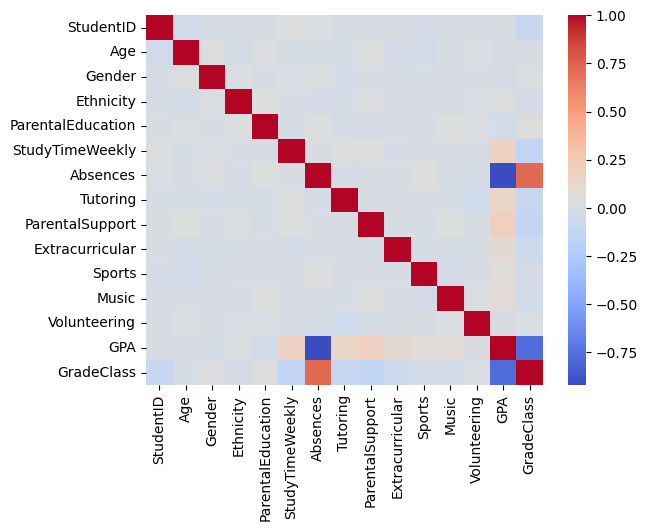

In [ ]:
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')

## I checked for distribution of target values.

<Axes: >

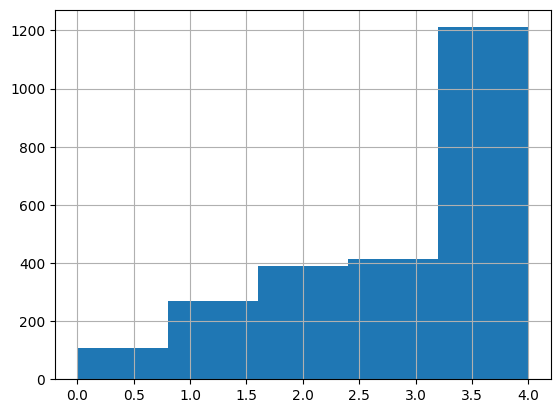

In [ ]:
data['GradeClass'].hist(bins=5)

## I split dataset into train and test datasets, train dataset weighing 80%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[cat+num], data['GradeClass'], train_size=0.8)

### I checked if their dimensions are allign, because to fit a model dataset must have same size

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1913, 13), (479, 13), (1913,), (479,))

### I checked if all unique values of dataset is available in test dataset. if some unique target values miss in test dataset, but model may predict it in test data, so it lowers accuracy

In [ ]:
y_test.value_counts()

GradeClass
4.0    227
2.0     94
3.0     80
1.0     59
0.0     19
Name: count, dtype: int64

### First I tried Logistic regression model

In [ ]:
model = LogisticRegression()
model.fit(X_train,  y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## prediction for test dataset

In [ ]:
y_pred = model.predict(X_test)

### checking for prediction values and test target values

In [ ]:
y_pred[:5]

array([2., 2., 4., 3., 2.])

In [ ]:
y_test[:5]

2155    2.0
145     2.0
1012    4.0
827     2.0
2166    2.0
Name: GradeClass, dtype: float64

### accuracy is 73%

In [ ]:
accuracy_score(y_test, y_pred)

0.7286012526096033

### to make some feature engineering or feature manipultions we need to make categorical features to boolean features using ONEHOTENCODER

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

### for trains dataset we use fit transform, for test dataset we use transform itself, because we make template of feature names based on categories of train dataset and then we just adjust test dataset to it, we do not need to make features from test dataset, because some values may not coincide with train category values

In [ ]:
ohe_train=ohe.fit_transform(X_train[cat])

In [ ]:
ohe_test =ohe.transform(X_test[cat])

In [ ]:
ohe_train.todense().shape

(1913, 30)

In [ ]:
X_train[num].values.shape

(1913, 3)

### and we join categorical and numerical features into one dataset to perform fitting.
### since categorical features are np.matrix, we join them with numerical feautres with np.hstack (horizontal). preliminarly converting matrix to np.

In [ ]:
X_train2 = np.hstack((ohe_train.todense(), X_train[num].values))

In [ ]:
X_train2.shape

(1913, 33)

In [ ]:
X_test2 = np.hstack((ohe_test.todense(), X_test[num].values))

In [ ]:
X_test2.shape

(479, 33)

In [ ]:
np.asarray(X_train2)

array([[ 0.        ,  1.        ,  0.        , ...,  9.03094046,
        16.        ,  1.81384662],
       [ 0.        ,  0.        ,  0.        , ...,  2.82252237,
         4.        ,  2.5761747 ],
       [ 1.        ,  0.        ,  0.        , ..., 14.39116827,
        21.        ,  1.5541129 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., 10.36436631,
        12.        ,  1.47167203],
       [ 0.        ,  0.        ,  1.        , ..., 12.26340721,
        10.        ,  1.8927587 ],
       [ 0.        ,  1.        ,  0.        , ...,  6.37394515,
        26.        ,  1.25234859]])

## then we fit new dataset with LR
### accuracy is 76% higher than previous

In [ ]:
model2 = LogisticRegression()
model2.fit(np.asarray(X_train2), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred2 = model2.predict(np.asarray(X_test2))

In [ ]:
accuracy_score(y_test, y_pred2)

0.7578288100208769

## we check to see what intervals are numerical features
### as we observe, each feature values are improportional. While first 2 features seem to be similar, third one is only ranging between 1 to 4. So we need to scale them so that their values seem to be proportional.

In [ ]:
X_train[num].head()

,StudyTimeWeekly,Absences,GPA
1428,9.030940,16,1.813847
555,2.822522,4,2.576175
1859,14.391168,21,1.554113
68,5.690239,21,1.329965
2172,13.023954,13,3.138784


### we use SS to scale them

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(X_train[num])

StandardScaler()

In [ ]:
X_train_num = ss.transform(X_train[num])
X_test_num = ss.transform(X_test[num])

In [ ]:
X_train_num.shape, X_test_num.shape

((1913, 3), (479, 3))

### now they seem pretty similar,

In [ ]:
X_train_num

array([[-0.14059254,  0.15975161, -0.08982619],
       [-1.24203833, -1.25836827,  0.7423495 ],
       [ 0.8103744 ,  0.7506349 , -0.37335778],
       ...,
       [ 0.09597276, -0.31295502, -0.46335222],
       [ 0.43288477, -0.54930833, -0.00368387],
       [-0.6119745 ,  1.34151818, -0.70277097]])

### we join them with categorical with hstack.

In [ ]:
X_train3 = np.hstack((ohe_train.todense(), X_train_num))
X_test3 = np.hstack((ohe_test.todense(), X_test_num))

In [ ]:
X_train3.shape, X_test3.shape

((1913, 33), (479, 33))

In [ ]:
X_train3=np.asarray(X_train3)
X_test3=np.asarray(X_test3)

## again we train with LR
accuracy is 77% a little more than previous one

In [ ]:
model3 = LogisticRegression(max_iter=200)
model3.fit(X_train3, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred3 = model3.predict(X_test3)

In [ ]:
accuracy_score(y_pred3, y_test)

0.7745302713987474

## After we tried some feature engineering, now it is turn to try other models than LR
then we try to fit with Decistion tree
accuracy is more than LR, it is 84%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train3, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = tree.predict(X_test3)

In [ ]:
accuracy_score(y_pred4, y_test)

0.8434237995824635

## If accuracy of decision tree is this high, probable RF must be even higher
yes indeed, accuracy is 89%.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train3, y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test3)
accuracy_score(y_pred5, y_test)

0.8977035490605428

## till now we tried to fit models with engineered features,
what if we try to fit RF with initial dataset
Awesome, it is even higher, 92% accuracy

In [ ]:
rf.fit(X_train, y_train)
y_pred6=rf.predict(X_test)
accuracy_score(y_pred6, y_test)

0.9227557411273486